In [7]:
%pip install Pillow
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 9.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 10.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.0 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 13.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   --- ------------------------------------ 3.4/44.5 MB 16.8 MB/s eta 0:00:03
   ------ --------------------------------- 7.3/44.5 MB 17.4 MB/s eta 0:00:03
   ---------- ----------------------------- 12.1/44.5 MB 19.4 MB/s eta 0:00:02
   ------------- -------------------------- 15.2/44.5 MB 18.0 MB/s eta 0:00:02
   ---------------- ----------------------- 17.8/44.5 MB 17.0 MB/s eta 0:00:02
   -------

In [8]:
# Import necessary libraries
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from urllib.parse import urlparse
import os

In [9]:
def load_image(input_path):
    if os.path.isfile(input_path):
        # Input is a local file
        try:
            img = Image.open(input_path)
            return img
        except UnidentifiedImageError:
            print(f"Could not identify image from the file: {input_path}")
            return None

In [19]:
def extract_blocks_with_positions(image_array, block_size):
        block_height, block_width = block_size
        img_height, img_width, channels = image_array.shape

        # Calculate the number of blocks along height and width
        num_blocks_vertical = img_height // block_height
        num_blocks_horizontal = img_width // block_width

        # Trim the image to fit an integer number of blocks
        trimmed_height = num_blocks_vertical * block_height
        trimmed_width = num_blocks_horizontal * block_width
        trimmed_image = image_array[:trimmed_height, :trimmed_width, :]

        # Extract blocks and their positions
        blocks = []
        positions = []

        for i in range(0, trimmed_height, block_height):
            for j in range(0, trimmed_width, block_width):

                if random.random() > 0.5:  # Skip half of the blocks
                    continue

                block = trimmed_image[i:i+block_height, j:j+block_width, :]

                # Check if block contains more than one pixel
                if block.size > 3:  # More than one pixel
                    # Reshape block to (-1, 3), each row is an RGB triplet
                    block_pixels = block.reshape(-1, 3)
                    # Check if all RGB triplets are the same
                    if np.all((block_pixels == block_pixels[0]).all(axis=1)):
                        # All pixels have the same RGB values
                        if random.random() > 0.1:  # Accept with 10% probability
                            continue  # Skip this block

                blocks.append(block.flatten())
                positions.append((j, i))  # (X, Y) position

        blocks = np.array(blocks)
        positions = np.array(positions)

        return blocks, positions

In [20]:
def visualize_pca_data(blocks_pca, block_size):
    plt.figure(figsize=(8,6))
    plt.scatter(blocks_pca[:, 0], blocks_pca[:, 1], s=5, alpha=0.7)
    plt.title(f'PCA of Blocks (size={block_size})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [21]:
def perform_knn_search(blocks_original, blocks_transformed, positions, random_indices, k=4,distance_method = 'euclidean'):
        # For each selected vector
        for idx in random_indices:
            vector_original = blocks_original[idx].reshape(1, -1)
            vector_transformed = blocks_transformed[idx].reshape(1, -1)
            position = positions[idx]
            vector_contents = vector_original.flatten()
            vector_str = np.array2string(vector_contents, formatter={'int':lambda x: f'{x:3d}'}, separator=',', max_line_width=80)
            print(f"\nSelected Vector at Position X={position[0]:>4}, Y={position[1]:>4}    Vector: {vector_str}")

            # Compute distances in PCA-transformed space
            if distance_method == 'euclidean':
                distances = euclidean_distances(vector_transformed, blocks_transformed).flatten()
            elif distance_method == 'manhattan':
                distances = manhattan_distances(vector_transformed, blocks_transformed).flatten()
            elif distance_method == 'cosine':
                 cosine_similarities = cosine_similarity(vector_transformed, blocks_transformed).flatten()
                 distances = 1 - cosine_similarities

            distances[idx] = np.inf

            # Find nearest neighbors
            nearest_indices = np.argsort(distances)[:k]

            print(f"Nearest neighbors in PCA-transformed space for {distance_method}:")
            print(f"{'Index':>6}  {'X':>6}  {'Y':>6}  {'Distance':>12}    {'Vector Contents'}")
            for n_idx in nearest_indices:
                neighbor_vector = blocks_original[n_idx].flatten()
                neighbor_position = positions[n_idx]
                distance = distances[n_idx]
                neighbor_vector_str = np.array2string(neighbor_vector, formatter={'int':lambda x: f'{x:3d}'}, separator=',', max_line_width=80)
                print(f"{n_idx:>6}  {neighbor_position[0]:>6}  {neighbor_position[1]:>6}  {distance:12.4f}    {neighbor_vector_str}")



In [22]:
input_path = r'pictures\52084941097_524408ef46_c.jpg' 
img = load_image(input_path)

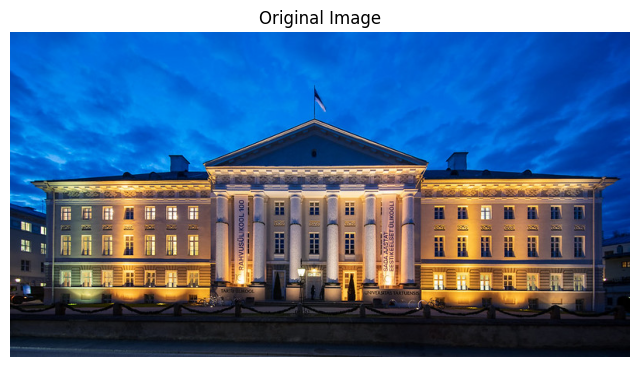


Processing block size: (1, 1)
Total blocks: 167197, Vector dimension: 3
Applying PCA...


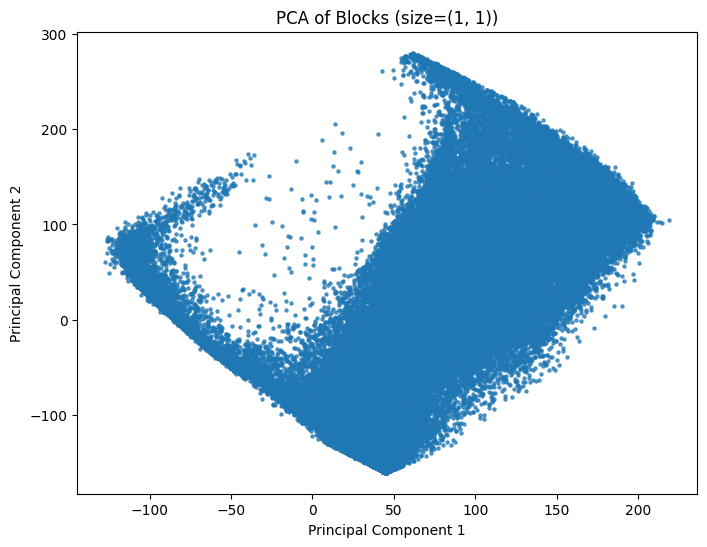

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X=  74, Y=   6    Vector: [  0, 90,200]
Nearest neighbors in PCA-transformed space for cosine:
 Index       X       Y      Distance    Vector Contents
 56590     667     141        0.0000    [  0, 90,200]
 56355     164     141        0.0000    [  0, 90,200]
   819      38       2        0.0000    [  0, 90,200]
 32334      10      81        0.0000    [  0, 90,200]
 33948       3      85        0.0000    [  0, 90,200]
 45415     745     113        0.0000    [  0, 90,200]
    14      26       0        0.0000    [  0, 90,200]
 56200     668     140        0.0000    [  0, 90,200]
  1237      39       3        0.0000    [  0, 90,200]
 38757     117      97        0.0000    [  0, 90,200]

Selected Vector at Position X= 708, Y= 398    Vector: [ 17, 18, 23]
Nearest neighbors in PCA-transformed space for cosine:
 Index       X       Y      Distance    Vector Contents
138767     379     347        0.0000    [ 17, 18, 

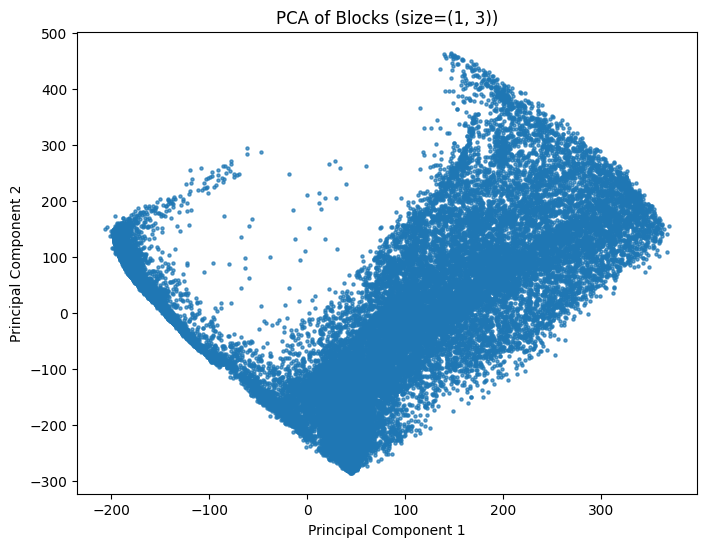

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X= 576, Y= 342    Vector: [254,194, 61,255,199, 69,255,204, 77]
Nearest neighbors in PCA-transformed space for cosine:
 Index       X       Y      Distance    Vector Contents
 24056     456     199        0.0000    [149,124,120,128,113,132, 68, 67,111]
 37609     693     301        0.0000    [140,123,107,142,125,109,143,126,110]
 34818     678     280        0.0000    [181,131, 96,236,163, 84,233,174, 96]
 26329     543     216        0.0000    [177,127,100,207,158, 99,205,155, 92]
 23833     735     197        0.0000    [113, 90, 76,190,153, 82,241,203,130]
 26483     627     217        0.0000    [181,128,112,174,121,107,178,121,110]
 39167     159     313        0.0000    [238,185,107,249,175, 78,225,148, 70]
 30742     144     250        0.0000    [233,162, 84,247,181, 85,245,188, 73]
 26040     423     214        0.0000    [247,192,101,227,165, 54,239,184, 83]
 27009     663     221        0.0000    [209

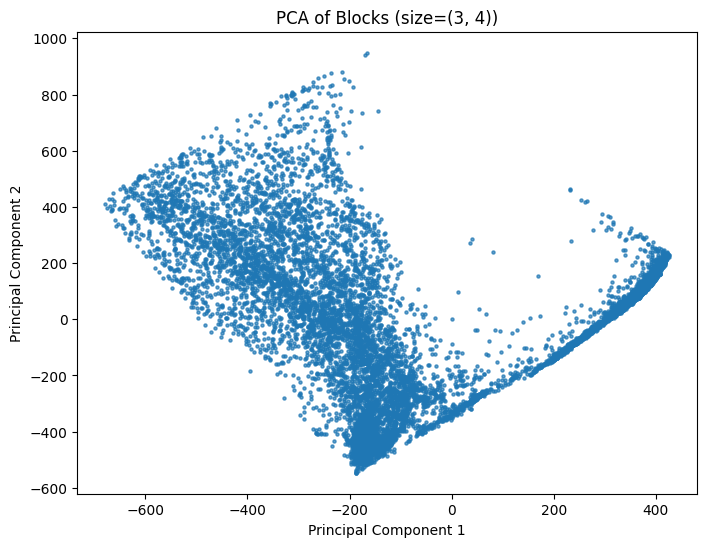

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X= 460, Y=  27    Vector: [  1,107,219,  0,106,218,  0,106,218,  0,106,218,  1,109,220,  0,108,219,  0,
 108,219,  0,108,219,  0,110,221,  0,109,220,  0,109,220,  1,109,220]
Nearest neighbors in PCA-transformed space for cosine:
 Index       X       Y      Distance    Vector Contents
  4986     628     150        0.0000    [  1,113,221,  0,114,221,  0,114,221,  0,113,220,  0,108,216,  0,109,217,  0,
 109,217,  0,109,217,  0,103,214,  0,104,215,  1,105,216,  0,106,216]
  1244     436      36        0.0000    [  0,109,224,  0,107,223,  0,105,222,  1,104,222,  0,108,223,  0,106,222,  0,
 105,222,  1,104,222,  0,107,222,  0,106,222,  0,105,222,  2,105,223]
   854     456      24        0.0000    [  1,107,219,  1,105,218,  0,104,217,  0,103,216,  2,108,220,  2,108,220,  1,
 107,219,  0,104,217,  3,111,222,  3,109,221,  2,108,220,  1,107,219]
  1725     304      51        0.0000    [  0,107,221,  0,107,221,  0,106

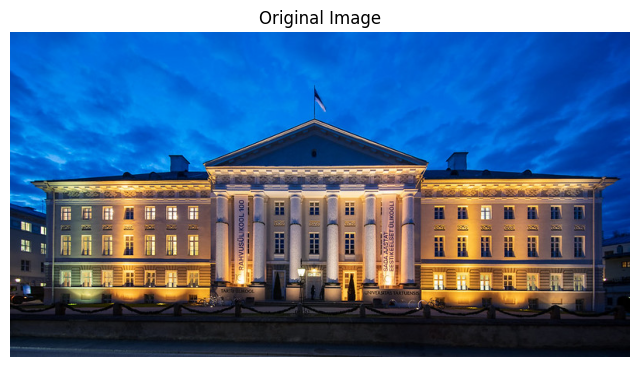


Processing block size: (1, 1)
Total blocks: 166996, Vector dimension: 3
Applying PCA...


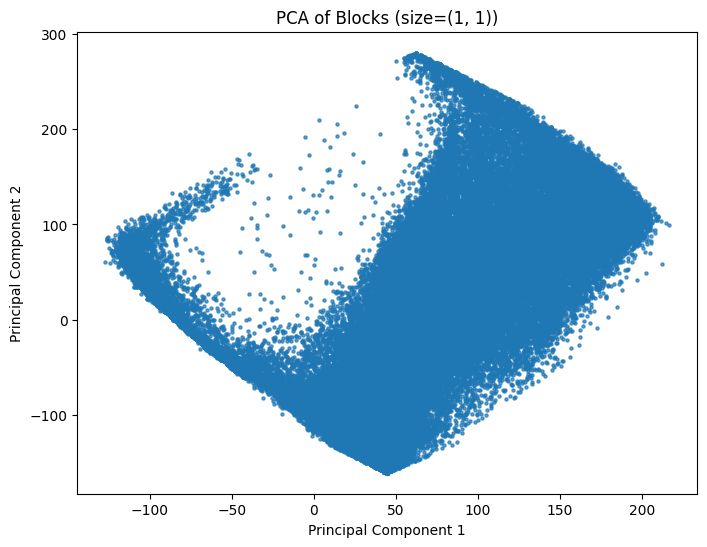

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X= 740, Y= 369    Vector: [ 35, 33, 44]
Nearest neighbors in PCA-transformed space for manhattan:
 Index       X       Y      Distance    Vector Contents
119153     556     298        0.0000    [ 35, 33, 44]
103879     300     260        0.1294    [ 41, 22, 50]
146699     774     367        0.4110    [ 37, 30, 46]
107593     613     269        0.6222    [ 41, 23, 49]
143615     132     360        0.7782    [ 34, 34, 44]
154246      96     387        0.8632    [ 33, 36, 43]
102119     703     255        0.8632    [ 33, 36, 43]
155452      99     390        0.8632    [ 33, 36, 43]
122013     790     305        0.8632    [ 33, 36, 43]
156264     121     392        0.9070    [ 32, 37, 41]

Selected Vector at Position X= 655, Y= 121    Vector: [  0, 77,185]
Nearest neighbors in PCA-transformed space for manhattan:
 Index       X       Y      Distance    Vector Contents
 28978     745      72        0.0000    [  0

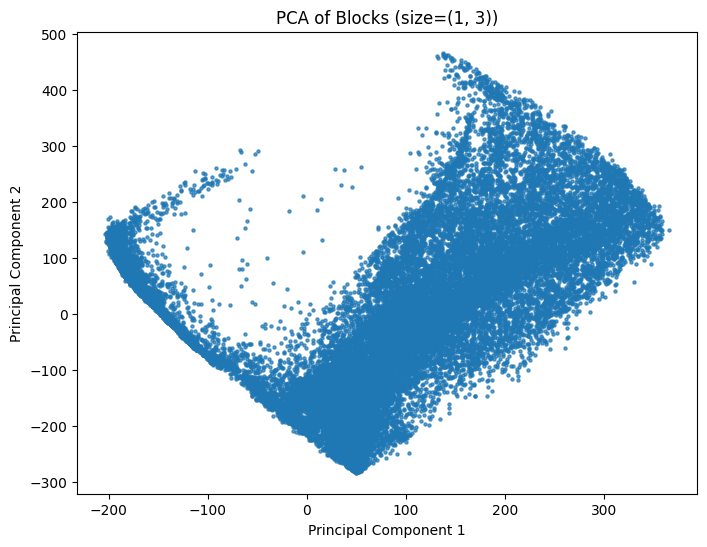

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X=   0, Y= 289    Vector: [ 57, 56, 62, 56, 55, 63, 56, 55, 63]
Nearest neighbors in PCA-transformed space for manhattan:
 Index       X       Y      Distance    Vector Contents
 35172     330     283        0.8557    [ 69, 59, 68, 46, 43, 54, 60, 56, 70]
 35361      15     285        1.2671    [ 53, 53, 65, 60, 60, 62, 55, 54, 62]
 35595       0     287        1.4703    [ 57, 56, 64, 56, 55, 63, 56, 55, 63]
 44601     246     355        1.5597    [ 67, 50, 69, 60, 43, 62, 57, 50, 68]
 38545     351     309        1.9569    [ 55, 49, 51, 54, 54, 62, 62, 61, 79]
 44739     273     356        2.0378    [ 51, 45, 59, 63, 57, 69, 60, 55, 62]
 36225       0     292        2.1914    [ 56, 55, 61, 56, 55, 63, 55, 54, 62]
 37241     678     299        2.3657    [ 55, 58, 63, 52, 57, 61, 62, 45, 64]
 44971      93     358        2.5526    [ 55, 49, 63, 57, 51, 65, 61, 55, 69]
 36496       3     294        2.6099    [

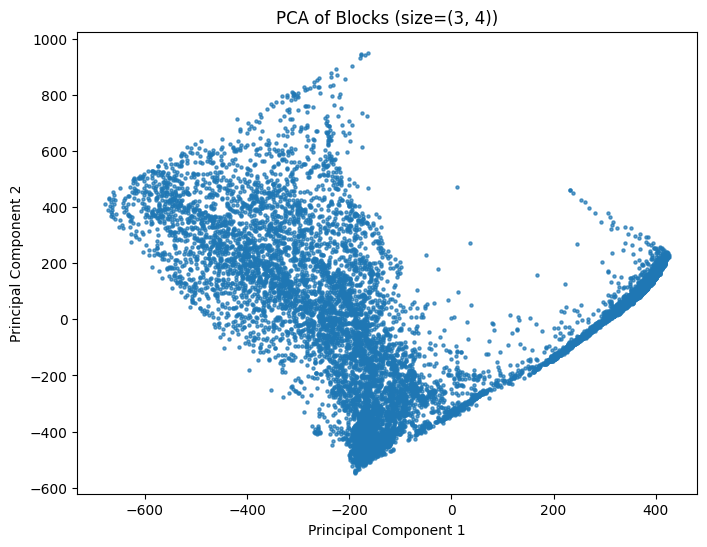

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X= 688, Y= 321    Vector: [151,107, 82,154,110, 85,158,113, 90,154,109, 88,115, 85, 59,111, 81, 57,121,
  89, 66,117, 85, 64, 92, 66, 39, 81, 55, 30, 92, 64, 40, 97, 69, 47]
Nearest neighbors in PCA-transformed space for manhattan:
 Index       X       Y      Distance    Vector Contents
 11421     684     345        2.8606    [126, 89, 63,133, 96, 67,129, 94, 62,126, 91, 59,113, 78, 58,123, 89, 64,127,
  93, 66,131, 97, 69, 94, 67, 48,102, 74, 52,113, 83, 59,126, 96, 72]
  7939     576     240       10.8457    [192,129, 85,  0, 14, 46,  0,  8, 53,  0, 12, 23,189,117, 93, 60, 52, 50, 46,
  38, 62, 62, 29, 48,230,143, 74,201,159, 51,227,165, 88,246,158,108]
  8423     640     255       10.9495    [149,120, 88, 65, 36, 20, 50, 22,  8,107, 83, 45, 73, 39, 40,103, 72, 69, 97,
  69, 58, 90, 62, 50,179,112, 85,187,121, 89,196,132, 94,200,137, 96]
  6840     532     207       13.1880    [137, 91, 75,144, 93, 72,128,

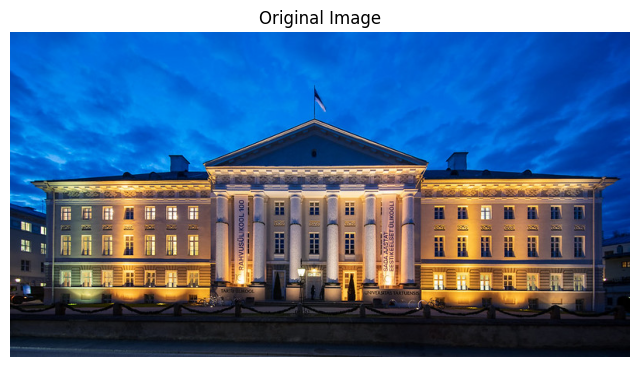


Processing block size: (1, 1)
Total blocks: 167284, Vector dimension: 3
Applying PCA...


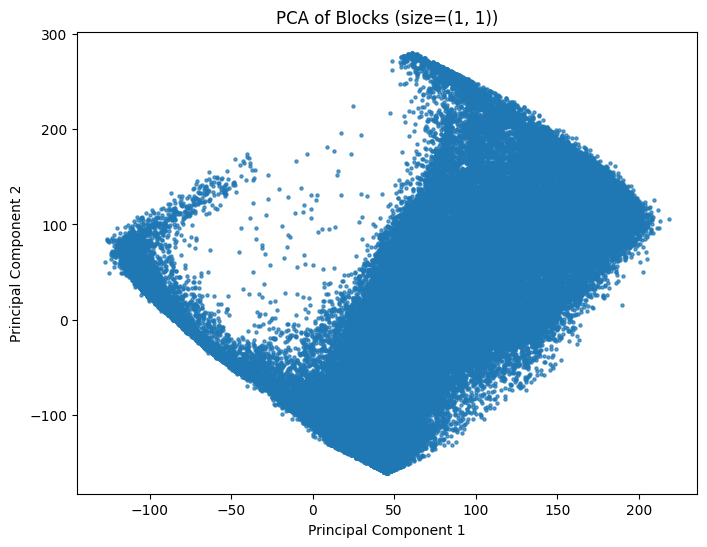

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X= 780, Y=  62    Vector: [  0, 78,191]
Nearest neighbors in PCA-transformed space for euclidean:
 Index       X       Y      Distance    Vector Contents
 24649     780      61        0.0000    [  0, 78,191]
 25877     785      64        0.6127    [  0, 77,191]
 28279     770      70        0.6127    [  0, 77,191]
 41858     794     104        0.6127    [  0, 77,191]
 20556     675      51        0.7181    [  0, 79,190]
 29101      16      73        0.7181    [  0, 79,190]
 42241     728     105        0.7181    [  0, 79,190]
 19355     676      48        0.7181    [  0, 79,190]
 27027     667      67        0.7181    [  0, 79,190]
 37047     724      92        0.7181    [  0, 79,190]

Selected Vector at Position X= 728, Y= 157    Vector: [  1, 66,168]
Nearest neighbors in PCA-transformed space for euclidean:
 Index       X       Y      Distance    Vector Contents
 60760     730     151        0.0000    [  1

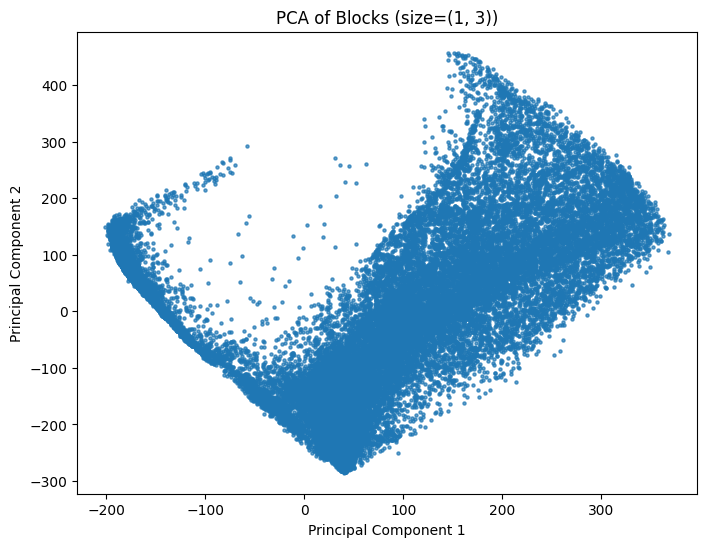

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X= 447, Y=  11    Vector: [  0,104,219,  0,103,216,  0,103,216]
Nearest neighbors in PCA-transformed space for euclidean:
 Index       X       Y      Distance    Vector Contents
  7581     471      68        0.0000    [  0,104,219,  0,103,216,  0,103,216]
  5222     567      47        0.0644    [  1,105,218,  0,102,217,  0,101,217]
  6991     225      63        0.1139    [  1,102,218,  1,102,218,  0,102,217]
  3656     582      33        0.3351    [  0,104,217,  0,104,217,  0,101,217]
 10826     465      96        0.4125    [  0,103,218,  0,103,218,  0,103,216]
  8162     468      73        0.4144    [  0,104,219,  0,102,217,  0,103,216]
 10471     465      93        0.4158    [  0,104,217,  0,104,217,  0,103,216]
  2796     459      25        0.4158    [  0,104,217,  0,104,217,  0,103,216]
  2246     456      20        0.4158    [  0,104,217,  0,104,217,  0,103,216]
  4987     585      45        0.4158    [

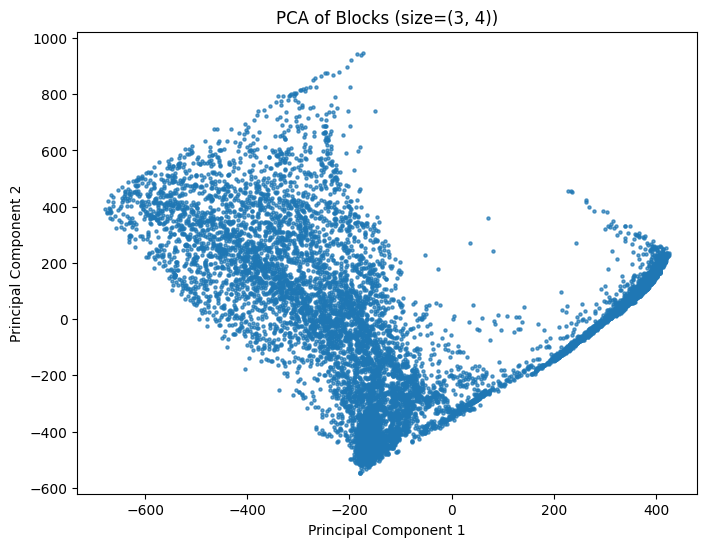

Performing K-NN search on PCA-transformed data...

Selected Vector at Position X= 756, Y= 147    Vector: [  0, 58,157,  0, 58,157,  0, 58,157,  0, 58,157,  0, 58,157,  0, 58,157,  0,
  58,157,  0, 58,157,  2, 57,157,  2, 57,157,  2, 57,157,  2, 57,157]
Nearest neighbors in PCA-transformed space for euclidean:
 Index       X       Y      Distance    Vector Contents
  5208     760     159        0.6868    [  1, 56,156,  1, 56,156,  1, 56,156,  0, 57,156,  1, 56,156,  0, 57,156,  0,
  58,158,  1, 59,159,  0, 58,157,  0, 58,157,  1, 59,159,  1, 59,159]
  5623     724     171        0.7788    [  0, 60,158,  0, 60,158,  0, 58,157,  0, 57,156,  0, 60,158,  1, 59,158,  0,
  57,156,  0, 56,155,  1, 59,158,  1, 59,158,  0, 57,156,  0, 56,155]
  1074     764      30        0.8484    [  1, 56,157,  1, 56,157,  1, 56,157,  2, 57,158,  1, 56,157,  1, 56,157,  2,
  57,158,  2, 57,158,  0, 55,158,  1, 56,159,  1, 56,159,  2, 57,160]
  2915     780      87        1.1578    [  1, 59,159,  1, 59,159,  0,

In [25]:
different_distance_methods = ['cosine','manhattan','euclidean']
for distance_method in different_distance_methods:
    if img is not None:
        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Original Image')
        plt.show()

        image_array = np.array(img)
        if image_array.shape[2] == 4:
            image_array = image_array[:, :, :3]  # Remove alpha channel if present
        height, width, channels = image_array.shape

        # Step 3 and 4: Process Blocks and Perform Similarity Search
        block_sizes = [(1,1), (1,3), (3,4)]  # Block sizes to process
        for block_size in block_sizes:
            print(f"\nProcessing block size: {block_size}")
            blocks, positions = extract_blocks_with_positions(image_array, block_size)
            num_blocks = blocks.shape[0]
            vector_dim = blocks.shape[1]

            print(f"Total blocks: {num_blocks}, Vector dimension: {vector_dim}")

            # **No normalization; keep blocks as integer RGB values**

            # Apply PCA (convert to float for PCA computation)
            print("Applying PCA...")
            blocks_float = blocks.astype(float)  # Convert to float for PCA
            pca = PCA(n_components=2)
            blocks_pca = pca.fit_transform(blocks_float)

            # Visualize the PCA-transformed data
            visualize_pca_data(blocks_pca, block_size)

            # Select 5 random indices
            random_indices = random.sample(range(num_blocks), 5)

            # Perform K-NN search on PCA-transformed data
            print("Performing K-NN search on PCA-transformed data...")
            perform_knn_search(blocks, blocks_pca, positions, random_indices, k=10,distance_method=distance_method)
      
    else:
        print("Image could not be loaded. Please check the input path or URL.")